In [1]:
from larlib import *
import csv
import numpy as np

Evaluating fenvs.py..
...fenvs.py imported in 0.007979 seconds


In [2]:
pearl = [.969,.969,.969]
yellow = [.894,.835,.686]
grey = [.776,.784,.733]
blue = [.569,.690,.804]
bronze = [.655,.553,.392]

In [3]:
def rounding(k):
    if k < 0.75 and k > -0.75:
        return 1
    if k < 0:
        return -1 / (1.8*sin(k))
    return 1 / (1.8*sin(k))

def Cilindro_Bombato(args):
    radius, h = args
    def Cilindro_Bombato0(subds):
        N , M = subds
        domain = T(1)(-PI/2)(POWER([INTERVALS(PI)(N),INTERVALS(2*PI)(M)]))
        fx  = lambda p: radius * cos(p[0]) * sin(p[1])
        fy  = lambda p: radius * cos(p[0]) * cos(p[1])
        fz  = lambda p: radius * sin(p[0]) * rounding(p[0]) / h
        ret =  MAP([fx, fy, fz])(domain)
        return ret
    return Cilindro_Bombato0

def column(w, h):
    basis = COLOR(yellow)(TOP([Cilindro_Bombato([w*1.1,3])([16,16]), Cilindro_Bombato([w,4])([16,16])]))
    trunk = COLOR(pearl)(CYLINDER([w*0.85, h - w])(16))
    capitel = COLOR(yellow)(Cilindro_Bombato([w*1.1,3])([16,16]))
    return T(3)(SIZE(3)(capitel)/2)(TOP([TOP([basis, trunk]), capitel]))

In [129]:
VIEW(column(3,24))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7fde6e3825a0> >

![Colonna frontale](colonna1.png)

In [4]:
def column2(args):
    radius, h = args
    def column2_0(subds):
        N , M = subds
        domain = T(1)(-PI/3)(POWER([INTERVALS(0.75*PI)(N),INTERVALS(2*PI)(M)]))
        fx  = lambda p: radius * cos(p[0]) * sin(p[1])
        fy  = lambda p: radius * cos(p[0]) * cos(p[1])
        fz  = lambda p: p[0]*h
        ret =  MAP([fx, fy, fz])(domain)
        return ret
    return column2_0

def decorated_column2(args):
    radius, h = args
    trunk = column2([radius,h])([8,8])
    basis = Cilindro_Bombato([radius*1.1,h/4.5])([8,8])
    capitel = Cilindro_Bombato([radius,h/4.5])([8,8])
    translation = SIZE(3)(basis)/2
    return COLOR(yellow)(T(3)(translation)(TOP([TOP([basis, trunk]), capitel])))

In [133]:
VIEW(decorated_column2([3,9]))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7fde6e2b2330> >

In [5]:
### COMIGNOLO ###

def halfSphere(radius):
    def halfSphere0(args):
        N, M = args
        domain = POWER([INTERVALS(PI/2)(N),INTERVALS(PI*2)(M)])
        fx = lambda p: radius * math.cos(p[0])  * math.sin (p[1])
        fy = lambda p: radius * math.cos(p[0]) * math.cos(p[1])
        fz = lambda p: radius * math.sin(p[0]) 
        return MAP([fx, fy, fz])(domain)
    return halfSphere0

base = COLOR(grey)(CUBOID([3,3,2]))
trunk = COLOR(pearl)(CYLINDER([1.25,9])(16))
com1 = TOP([base, trunk])
spazio = STRUCT([T(1)(-1)(CYLINDER([.1,.5])(8)), \
                 T(1)(1)(CYLINDER([.1,.5])(8)), \
                 T(2)(-1)(CYLINDER([.1,.5])(8)), \
                 T(2)(1)(CYLINDER([.1,.5])(8))])
com2 = TOP([com1, spazio])
hf = COLOR(blue)(halfSphere(2)([16,16]))
comignolo = S([1,2,3])([1.4,1.4,1.2])(TOP([com2, hf]))
VIEW(comignolo)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f6261851f30> >

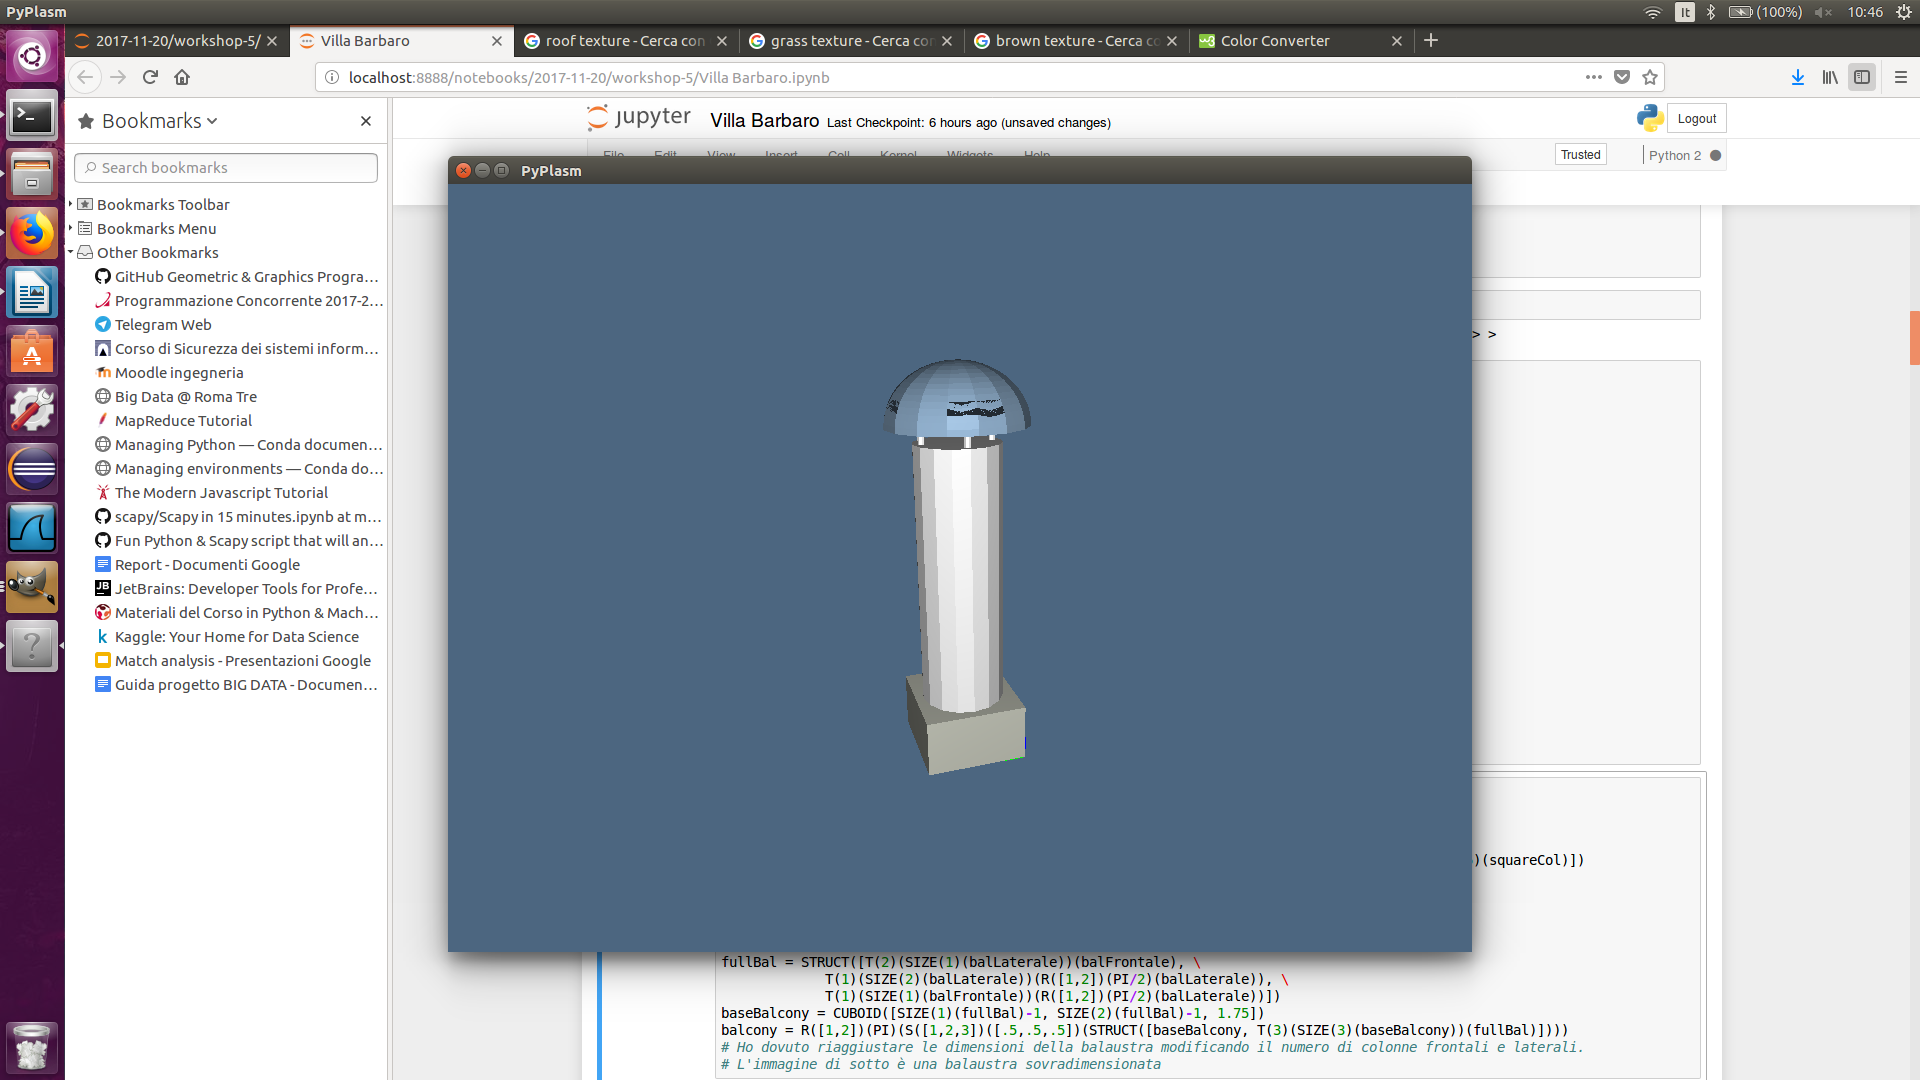

In [6]:
### BALCONY ###
colBalaustra = COMP([STRUCT, NN(4)])([decorated_column2([2.,6.]), T(1)(6)])
squareCol = COLOR(yellow)(T(2)(-1.5)(CUBOID([3., 3., SIZE(3)(colBalaustra)])))
halfBalaustraFrontale = STRUCT([squareCol, T(1)(8)(colBalaustra)])
fullBalaustraFrontale = STRUCT([halfBalaustraFrontale, T(1)(SIZE(1)(halfBalaustraFrontale)+2.5)(squareCol)])
frontRect = COLOR(yellow)(CUBOID([SIZE(1)(fullBalaustraFrontale)+2, 5, .7]))
balFrontale = TOP([frontRect,TOP([fullBalaustraFrontale, frontRect])])
colLatBalaustra = COMP([STRUCT, NN(1)])([decorated_column2([2.,6.]), T(1)(6)])
sideRect = COLOR(yellow)(CUBOID([SIZE(1)(colLatBalaustra)+3, 5, .7]))
balLaterale = TOP([sideRect,TOP([colLatBalaustra, sideRect])])
fullBal = STRUCT([T(2)(SIZE(1)(balLaterale))(balFrontale), \
             T(1)(SIZE(2)(balLaterale))(R([1,2])(PI/2)(balLaterale)), \
             T(1)(SIZE(1)(balFrontale))(R([1,2])(PI/2)(balLaterale))])
baseBalcony = TEXTURE('White_marble_texture2.jpg')(CUBOID([SIZE(1)(fullBal)-1, SIZE(2)(fullBal)-1, 1.75]))
balcony = R([1,2])(PI)(S([1,2,3])([.5,.5,.5])(STRUCT([baseBalcony, T(3)(SIZE(3)(baseBalcony))(fullBal)])))
# Ho dovuto riaggiustare le dimensioni della balaustra modificando il numero di colonne frontali e laterali.
# L'immagine di sotto è una balaustra sovradimensionata

In [192]:
VIEW(balcony)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7fde6e2bd570> >

![](balcone.png)

In [ ]:
### SCALE ###

def vdom(h):
    return PROD([COMP([EMBED(1),INTERVALS(1)])(3),QUOTE([h])])

def hdom(w):
    return COMP([S(2)(-1), EMBED(1)])(PROD([INTERVALS(1)(3), QUOTE([w])]))

def step(h,w,l):
    edge = R([2,3])(PI/2)(MKPOL([[[w,h],[w,0],[0,h]],[[1,2,3]],[]]))
    return JOIN([edge, T(2)(l)(edge)])

def ramp(h,w,l,n,c):
    """
    h, w = altezza e larghezza del singolo gradino
    l = larghezza della rampa
    n = numero di gradini
    c = corrimano: 0 -> nessuno
                   1 -> solo sx
                   2 -> solo dx
                   3 -> entrambi
    NOTA BENE: Per valori troppo piccoli si consiglia di usare float e non int
    """
    corrimano1 = CYLINDER([h/6,h*3])(8)
    corrimano2 = CYLINDER([h/6, h*4/np.sqrt(4)])(8)
    siz1x = SIZE(1)(corrimano1)
    siz1z = SIZE(3)(corrimano1)
    siz2z = SIZE(3)(corrimano2)
    corrimanoFinale = COLOR(bronze)(STRUCT([corrimano1, T(3)(siz1z*1.03)(R([1,3])(PI/4)(T(3)(-siz2z/2)(corrimano2)))]))
    items = [COLOR(pearl)(step(h,w,l))]
    if c==1 or c==3:
        items.append(T([1,2,3])([w/2,siz1x/2,h])(corrimanoFinale))
    if c==2 or c==3:
        items.append(T([1,2,3])([w/2,l-siz1x/2,h])(corrimanoFinale))
    items.append(T([1,3])([h,-w]))
    return T(3)((n-1)*h)(COMP([STRUCT, NN(n)])(items))

ramp1 = ramp(6,6,20,10,3)
portionRamp = ramp(.5,.5,1.,5,1)
turn = COLOR(pearl)(T([1,3])([-1,2.5])(CUBOID([SIZE(2)(portionRamp)+.5,SIZE(2)(portionRamp),.1])))
turningRamp = R([1,2])(PI/2)(COMP([STRUCT, NN(3)])([portionRamp, turn, R([1,2])(PI/2),T([1,3])([-2.5,2.5])]))
scaledTurningRamp = S([1,2,3])([5,5,4.])(turningRamp)
VIEW(scaledTurningRamp)

In [199]:
### WINDOWS AND ENTRANCES ###

def bottomArc(d):
    return BEZIER(S1)([[0, 0],[0, 2*d/3],[d, 2*d/3],[d, 0]])

def topArc(d):
    return BEZIER(S1)([[0, 2*d/3],[d, 2*d/3]])

def arc2D(d):
    return BEZIER(S2)([bottomArc(d), topArc(d)])

def window(w1,o,w2,h):
    tempWind = POWER([QUOTE([w1,o,w2]), QUOTE([h-14])])
    tempWall = POWER([QUOTE([SIZE(1)(tempWind)]), QUOTE([7])])
    return STRUCT([T(2)(SIZE(2)(tempWall))(tempWind), tempWall, T(2)(SIZE(2)(tempWall)+SIZE(2)(tempWind))(tempWall)])

def singleToDouble(Obj, extraHeight = 0):
    if extraHeight == 0:
        return STRUCT([Obj, T(2)(SIZE(2)(Obj))(Obj)])
    extraWall = POWER([QUOTE([SIZE(1)(Obj)]), QUOTE([extraHeight])])
    return STRUCT([Obj, T(2)(SIZE(2)(Obj))(Obj), T(2)(2*SIZE(2)(Obj))(extraWall)])
    
def straightEntrance(l,o,r,h1,h2):
    """
    l, r = lunghezza del muro a sinistra e destra della porta
    o = negativo, larghezza della porta stessa
    h1 = altezza della porta
    h2 = altezza del muro sopra la porta
    """
    tmp = POWER([QUOTE([l,o,r]), QUOTE([h1])])
    if h2 != 0:
        wall = POWER([QUOTE([SIZE(1)(tmp)]), QUOTE([h2])])
        return STRUCT([T(2)(SIZE(2)(tmp))(wall), tmp])
    else:
        return tmp

def thickness(t):
    def thickness0(Obj):
        return POWER([Obj, QUOTE([t])])
    return thickness0

exW = 10
arc10 = MAP(arc2D(10))(PROD([INTERVALS(1)(8), INTERVALS(1)(1)]))
tempSEntrance = POWER([QUOTE([7.5,-10,7.5]), QUOTE([25])])
tempWall = POWER([QUOTE([SIZE(1)(tempSEntrance)]), QUOTE([5])])
singleSEntrance = STRUCT([T(2)(SIZE(2)(tempSEntrance))(tempWall), tempSEntrance])
tempCEntrance = POWER([QUOTE([7.5,-10,7.5]), QUOTE([30])])
singleCEntrance = STRUCT([T([1,2])([7.5,SIZE(2)(tempCEntrance)-SIZE(2)(arc10)])(arc10), tempCEntrance])
extraWall = POWER([QUOTE([SIZE(1)(singleCEntrance)]), QUOTE([exW])])
doubleEntrance = STRUCT([singleSEntrance, T(2)(SIZE(2)(singleSEntrance))(singleCEntrance), \
                         T(2)(SIZE(2)(singleCEntrance)+SIZE(2)(singleSEntrance))(extraWall)])

front = COLOR(yellow)(R([2,3])(PI/2)(RIGHT([RIGHT([thickness(3)(singleToDouble(window(7.5,-10,7.5,30), exW)), thickness(3)(doubleEntrance)]), \
               thickness(3)(singleToDouble(window(7.5,-10,7.5,30), exW))])))
sizFront = SIZE(1)(front)
front = STRUCT([front, T([1,2,3])([sizFront/3+21.5,-3,30])(balcony)])
left = COLOR(yellow)(R([2,3])(PI/2)(RIGHT([RIGHT([thickness(3)(singleToDouble(window(6,-10,9,30), exW)), \
              thickness(3)(singleToDouble(window(9,-10,6,30), exW))]), \
              RIGHT([thickness(3)(doubleEntrance), \
              thickness(3)(singleToDouble(window(3.5,-8,10,30), exW))])])))
left = STRUCT([left, T([1,2,3])([20.5+51,-3,30])(balcony)])
right = COLOR(yellow)(R([2,3])(PI/2)(RIGHT([RIGHT([RIGHT([thickness(3)(singleToDouble(window(10,-8,3.5,30), exW)), \
                      thickness(3)(doubleEntrance)]), \
                      thickness(3)(singleToDouble(window(6,-10,9,30), exW))]), \
                      thickness(3)(singleToDouble(window(9,-10,6,30), exW))])))
sizSide = SIZE(1)(right)
right = STRUCT([right, T([1,2,3])([20.5+23,-3,30])(balcony)])
right = T(2)(SIZE(1)(right))(R([1,2])(-PI/2)(right))

left = T(1)(sizFront)(R([1,2])(PI/2)(left))

wall=STRUCT([right, front, left])
base = CUBOID([sizFront+3, SIZE(2)(left)+3, 3])
wall50 = COLOR(yellow)(R([1,2])(PI/2)(R([2,3])(PI/2)(thickness(2)(singleToDouble(straightEntrance(20,-10,20,20,10), exW)))))
wall50t = COLOR(yellow)(R([1,2])(PI/2)(R([2,3])(PI/2)(thickness(2)(singleToDouble(straightEntrance(35,-10,12,20,10), exW)))))
partialWall = STRUCT([wall, T(1)(sizFront*2/3)(wall50), T(1)(sizFront*1/3)(wall50), \
                      T([1,2])([sizFront*2/3, 74])(wall50t), T([1,2])([sizFront*1/3, 74])(wall50t)])
oExtraWall = POWER([QUOTE([sizFront]), QUOTE([exW])])
oWall = COLOR(yellow)(R([2,3])(PI/2)(thickness(2)(STRUCT([straightEntrance(sizFront*1/3,-sizFront*1/3,sizFront*1/3,60,0), \
                                            T(2)(60)(oExtraWall)]))))
partialWall = STRUCT([partialWall, T(2)(50)(oWall), T(2)(SIZE(2)(left))(oWall)])
o2Wall = COLOR(yellow)(R([2,3])(PI/2)(thickness(2)(singleToDouble(straightEntrance(7.5,-10,7.5,20,10), exW))))
partialWall = STRUCT([partialWall, T([1,2])([sizFront*2/3,76])(o2Wall), T([1,2])([0,76])(o2Wall)])

firstFloorCells = [[0,0],[sizFront,0],[sizFront,sizSide],[sizFront*2/3,sizSide], \
                   [sizFront*2/3,SIZE(2)(wall50t)+74],[sizFront*1/3,SIZE(2)(wall50t)+74], \
                   [sizFront*1/3,sizSide],[0,sizSide]]
firstFloorEdges = [[1,2,3,8],[4,5,6,7]]
firstFloor2D = MKPOL([firstFloorCells, firstFloorEdges, None])
firstFloor3D = TEXTURE('White_marble_texture2.jpg')(T(3)(28)(POWER([firstFloor2D, QUOTE([2])])))
counterCeiling = TEXTURE('White_marble_texture2.jpg')(T(3)(30)(firstFloor3D))

### DECORAZIONI FRONTALI ###
base1 = MKPOL([[[0,0],[0,sizFront/3+10],[8,sizFront/3+10],[8,0]],[[1,2,3,4]],None])
base2 = MKPOL([[[0,0],[0,sizFront/3+12],[8,sizFront/3+12],[8,0]],[[1,2,3,4]],None])
base = JOIN([base1, T([2,3])([-1,3])(base2)])
base = TOP([base, CUBOID([7.5,sizFront/3+10,2])])
_2bases = STRUCT([base, T(2)(2*sizFront/3-1.5)(base), T([2,3])([-1,5])(CUBOID([8,sizFront+10,1]))])
frontCover2D = MKPOL([[[0,0],[0,sizFront+5],[23,(sizFront+5)/2]],[[1,2,3]],None])
frontCover3D = COLOR(yellow)(R([1,3])(PI/2)(thickness(2)(frontCover2D)))
fullFrontCover = R([1,2])(PI/2)(TOP([_2bases, frontCover3D]))

frontColumn = column(4.,69.6-SIZE(3)(_2bases))

partialWall = STRUCT([partialWall, \
                      T([1,2])([sizFront/3, -3])(frontColumn), \
                      T([1,2])([sizFront*2/3, -3])(frontColumn), \
                      T([1,2])([sizFront, -3])(frontColumn), \
                      T([1,2])([0, -3])(frontColumn), \
                      T([1,2,3])([sizFront+4.5,-8,SIZE(3)(frontColumn)])(fullFrontCover)])
frontBuilding = STRUCT([partialWall, firstFloor3D])

### BASE ###
basamento1 = TEXTURE('White_marble_texture.jpg')(CUBOID([SIZE(1)(frontBuilding)-4, SIZE(2)(frontBuilding)-4,.5]))
basamento2 = TEXTURE('White_marble_texture.jpg')(CUBOID([SIZE(1)(frontBuilding)-2, SIZE(2)(frontBuilding)-2,.5]))
basamentoFull = TOP([basamento2,basamento1])
frontBuilding = BOTTOM([frontBuilding, basamentoFull])

### SCALE DOPPIE SUL RETRO DELLA SEZIONE ####
singleRampSX = ramp(2.,2.,12,15,3)
singleRampDX = ramp(2.,2.,12,15,3)
doubleTurn = TEXTURE('White_marble_texture2.jpg')(T([1,3])([-9,15*2])(CUBOID([SIZE(2)(portionRamp)+8.5,10+24,.1])))
doubleRamp = STRUCT([T(2)(SIZE(2)(doubleTurn)-SIZE(2)(singleRampSX))(singleRampSX), singleRampDX, doubleTurn])

frontBuilding = STRUCT([frontBuilding, \
                        T([1,2])([59,97])(doubleRamp),\
                        T([1,2])([16,131])(R([1,2])(PI)(doubleRamp))])


In [200]:
VIEW(frontBuilding)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7fde6e28e4b0> >

In [105]:
tot = 139.5 + 52
delta = 1.15
lengthTettoCentrale = delta+(SIZE(1)(front)/2)/sqrt(3)*2
frontExtraSpace = 3+SIZE(1)(frontColumn)/2


centralFrontRoofCells = [[0,0],[0,50+frontExtraSpace],[0,75+frontExtraSpace],[0,tot-2], \
                         [lengthTettoCentrale,tot-2], \
                         [lengthTettoCentrale,75+frontExtraSpace],[lengthTettoCentrale-2,75+frontExtraSpace], \
                         [lengthTettoCentrale-2,50+frontExtraSpace],[lengthTettoCentrale,50+frontExtraSpace], \
                         [lengthTettoCentrale,0]]
centralFrontRoofVerts = [[1,2,9,10],[2,3,7,8],[3,4,5,6]]
centralFrontRoof = MKPOL([centralFrontRoofCells, centralFrontRoofVerts, None])
centralFrontRoof3D1 = POWER([centralFrontRoof, QUOTE([2])])
centralFrontRoof3D2 = T(3)(SIZE(3)(centralFrontRoof3D1))(R([1,3])(PI)(centralFrontRoof3D1))
centralFrontRoofFull = STRUCT([R([1,3])(-PI/6)(T(1)(-delta)(centralFrontRoof3D1)), \
                               R([1,3])(PI/6)(T(1)(delta)(centralFrontRoof3D2))])
otherSideRoofSize = SIZE(1)(centralFrontRoofFull)
sideFrontRoof3D1 = CUBOID([14/cos(PI/6),otherSideRoofSize,2])
sideFrontRoof3D2 = T(3)(SIZE(3)(sideFrontRoof3D1))(R([1,3])(PI)(sideFrontRoof3D1))
sideFrontRoofFull = STRUCT([R([1,3])(-PI/6)(T(1)(-delta)(sideFrontRoof3D1)), \
                               R([1,3])(PI/6)(T(1)(delta)(sideFrontRoof3D2))])
sideFrontRoofFull = TEXTURE('Roof_texture.jpg')(R([1,2])(PI/2)(T(2)(-otherSideRoofSize/2)(sideFrontRoofFull)))
roofCover2D = MKPOL([[[0,0],[0,SIZE(2)(sideFrontRoofFull)-2],[SIZE(3)(sideFrontRoofFull)-2,(SIZE(2)(sideFrontRoofFull)-2)/2]],[[1,2,3]],None])
roofCover3D = R([1,3])(PI/2)(thickness(2)(roofCover2D))
newSideFrontRoofFull = STRUCT([T([1,2,3])([SIZE(1)(sideFrontRoofFull)/2-1.5,-(SIZE(2)(roofCover3D))/2,-SIZE(3)(sideFrontRoofFull)+2.3])(roofCover3D), \
                               sideFrontRoofFull, \
                               T([1,2,3])([-SIZE(1)(sideFrontRoofFull)/2+3,-(SIZE(2)(roofCover3D))/2,-SIZE(3)(sideFrontRoofFull)+2.3])(roofCover3D)])
newSideFrontRoofFull = T([2,3])([frontExtraSpace,SIZE(3)(newSideFrontRoofFull)-SIZE(3)(centralFrontRoofFull)])(newSideFrontRoofFull)
centralRoof = TEXTURE('Roof_texture.jpg')(S([1,3])([1.1,1.05])(STRUCT([centralFrontRoofFull, T(2)(62.5)(newSideFrontRoofFull)])))

### PORZIONE TETTO SUL RETRO ###
tBase1 = TOP([CUBOID([sizFront+10,8,1]), R([1,2])(PI/2)(frontCover3D)])
tBase21 = CUBOID([sizFront+8,3,10])
tBase22 = CUBOID([3,20,10])
tBase20 = T([1,2])([1,1.5])(STRUCT([tBase21, tBase22, T(1)(SIZE(1)(tBase21)-3)(tBase22)]))
finalTBase = STRUCT([tBase20, T(3)(SIZE(3)(tBase20)-1)(tBase1)])
finalTBase = T(1)(SIZE(1)(finalTBase))(R([1,2])(PI)(finalTBase))

frontWithRoof = STRUCT([frontBuilding,T([1,2,3])([otherSideRoofSize/2-.5,-frontExtraSpace, \
                                                  SIZE(3)(frontBuilding)+SIZE(3)(centralRoof)-26])(centralRoof), \
                        T(3)(74.5)(comignolo), T([1,3])([sizFront-3,74.5])(comignolo), \
                        T([1,2,3])([-4.5,182,61])(finalTBase)])

In [106]:
VIEW(frontWithRoof)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7fde6e4636c0> >

In [182]:
def quarterCircle(R):
    def quarterCircle0(subs):
        N , M = subs
        domain= POWER([INTERVALS(PI/2)(N), INTERVALS(R)(M)])
        fun=lambda p: [p[1]*cos(p[0]),p[1]*sin(p[0])]
        return MAP(fun)(domain)
    return quarterCircle0

def weirdShape(R):
    def weirdShape0(subs):
        N, M, T = subs
        base = MKPOL([[[0,0],[R,0],[0,R],[R,R]],[[1,2,3,4]], None])
        circ = quarterCircle(R)([N,M])
        return COLOR(yellow)(thickness(T)(DIFFERENCE([base, circ])))
    return weirdShape0

### ARCATA ###

colonnaArcata = STRUCT([T(2)(-.25)(COLOR(pearl)(CUBOID([3.5,4.5,3]))), \
                        T(3)(3)(COLOR(yellow)(CUBOID([3,4,31]))), \
                        T([2,3])([-.25,34])(COLOR(pearl)(CUBOID([3.5,4.5,3]))), \
                        T([2,3])([0,50])(COLOR(yellow)(CUBOID([20,4,10]))), \
                        T(3)(37)(COLOR(yellow)(CUBOID([3,4,23])))])
arc20 = MAP(arc2D(20))(PROD([INTERVALS(1)(8), INTERVALS(1)(1)]))
arc3D_20 = COLOR(yellow)(T([1,2,3])([3,4,37])(R([2,3])(PI/2)(POWER([arc20, QUOTE([4])]))))
halfArcoFrontale = STRUCT([colonnaArcata, arc3D_20])
arcoFrontale = STRUCT([colonnaArcata, arc3D_20, \
                       T([1,2])([20+3+3,4])(R([1,2])(PI)(colonnaArcata))])
fullArchiFrontali = COMP([STRUCT, NN(5)])([arcoFrontale, T(1)(SIZE(1)(arcoFrontale))])

colonnaArcataDoppia = STRUCT([T(2)(-.5)(COLOR(pearl)(CUBOID([6.5,6,3]))), \
                        T(3)(3)(COLOR(yellow)(CUBOID([6,5,31]))), \
                        T([2,3])([-.5,34])(COLOR(pearl)(CUBOID([6.5,6,3]))), \
                        T([1,3])([6,50])(COLOR(yellow)(CUBOID([20,5,10]))), \
                        T(3)(37)(COLOR(yellow)(CUBOID([6,5,23])))])
colonnaArcataDoppiaT2 = STRUCT([T(2)(-.5)(COLOR(pearl)(CUBOID([6.5,6,3]))), \
                        T(3)(3)(COLOR(yellow)(CUBOID([6,5,31]))), \
                        T([2,3])([-.5,34])(COLOR(pearl)(CUBOID([6.5,6,3]))), \
                        T(3)(37)(COLOR(yellow)(CUBOID([6,5,23])))])
arc3D_20b = T([1,2,3])([6,5,37])(R([2,3])(PI/2)(POWER([arc20, QUOTE([5])])))
halfArcoFrontale = STRUCT([colonnaArcataDoppia, arc3D_20b])
arcoFrontaleDoppio = STRUCT([colonnaArcataDoppia, arc3D_20b, \
                       T([1,2])([20+6+6,5])(R([1,2])(PI)(colonnaArcataDoppia))])
fullArchiFrontaliDoppio = COMP([STRUCT, NN(3)])([arcoFrontaleDoppio, T(1)(SIZE(1)(arcoFrontaleDoppio))])
fullArchiFrontaliDoppio = RIGHT([LEFT([fullArchiFrontaliDoppio, \
                                  T([1,2])([SIZE(1)(fullArchiFrontaliDoppio), 5]) \
                                  (R([1,2])(PI)(colonnaArcataDoppiaT2))]), colonnaArcataDoppiaT2])
alcove = T([1,3])([-3,12])(COMP([STRUCT, NN(4)])([CUBOID([6,3.5,12]), T(1)(32)]))
fullArchiConAlcove = DIFFERENCE([fullArchiFrontaliDoppio, alcove])
arcoRuotato = T([1,2])([-6,SIZE(1)(arcoFrontaleDoppio)+5])(R([1,2])(-PI/2)(arcoFrontaleDoppio))

fullArchiLaterali = STRUCT([fullArchiConAlcove, T(1)(SIZE(1)(fullArchiConAlcove)-6)(arcoRuotato), \
                            arcoRuotato])
                            
### MERIDIANA ###

sizXlat = SIZE(1)(fullArchiLaterali)
sizYlat = SIZE(2)(fullArchiLaterali)
sizZlat = SIZE(3)(fullArchiLaterali)
sizXunit = sizXlat / 9

myShape1 = R([1,2])(PI/2)(weirdShape(sizXlat/3)([16,16,5]))
myShape1 = R([1,3])(PI/2)(myShape1)
myShape2 = R([1,2])(PI)(myShape1)
myShape1 = T([1,3])([SIZE(1)(myShape1),SIZE(3)(myShape1)])(myShape1)
myShape2 = T([2,3])([sizXlat,SIZE(3)(myShape2)])(myShape2)
frontTempTop = T([2,3])([0.975*sizXlat/3,sizXlat/3])(CUBOID([6,1.05*sizXlat/3,2]))

centralSquare = R([1,3])(-PI/2)(TOP([COLOR(yellow)(CUBOID([sizXlat/3+2,sizXlat/3,sizXlat/3])), \
                                     thickness(1)(COLOR(pearl)(CIRCLE(0.9*sizXlat/6)([16,16])))]))
centralSquare = T([1,2,3])([-sizXlat/3+5.5, sizXlat/3, sizXlat/3+2])(centralSquare)

tettoLatCells = [[0,0,0],[0,sizXlat/6,sizXlat/8],[0,sizXlat/3,0], \
                 [sizXlat/3,0,0],[sizXlat/3,sizXlat/6,sizXlat/8],[sizXlat/3,sizXlat/3,0]]
tettoLatVerts = [[1,2,3],[4,6,5],[1,3,4,6],[1,4,5,2],[5,6,3,2]]
tettoLatSmall = COLOR(yellow)(MKPOL([tettoLatCells, tettoLatVerts, None]))
yInclinato = sqrt((sizXlat/6)**2 + (sizXlat/8)**2)
tegole = TEXTURE('Roof_texture.jpg')(R([2,3])(PI/4.9)(T([1,2])([-2,-2.5])(CUBOID([sizXlat/3+4, yInclinato+3.95, 2]))))
tegole2 = TEXTURE('Roof_texture.jpg')(T([1,2])([sizXlat/3,sizXlat/3])(R([1,2])(PI)(tegole)))
fullTettoSmall = T([1,2,3])([-sizXlat/3+5.5,sizXlat/3,sizXlat/3+2])(STRUCT([tegole,tettoLatSmall,tegole2]))

latMeridiana = R([1,2])(-PI/2)(STRUCT([myShape1,myShape2,frontTempTop,centralSquare,fullTettoSmall]))
baseMeridiana = CUBOID([SIZE(1)(latMeridiana), SIZE(2)(latMeridiana)-2, 3])
fullMeridiana = STRUCT([T(3)(3)(latMeridiana), T(2)(-6)(baseMeridiana)])

fullArchiLaterali = STRUCT([fullArchiLaterali, T([1,2,3])([-6.5,5,60])(fullMeridiana)])


aggr1 = STRUCT([frontBuilding, \
                T([1,2])([-SIZE(1)(fullArchiFrontali)-3,sizSide-SIZE(2)(fullArchiFrontali)])(fullArchiFrontali), \
                T([1,2])([sizFront+3,sizSide-SIZE(2)(fullArchiFrontali)])(fullArchiFrontali)])
aggr1conTetto = STRUCT([frontWithRoof, \
                        T([1,2])([-SIZE(1)(fullArchiFrontali)-3,sizSide-SIZE(2)(fullArchiFrontali)])(fullArchiFrontali), \
                        T([1,2])([sizFront+3,sizSide-SIZE(2)(fullArchiFrontali)])(fullArchiFrontali)])
VIEW(aggr1)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7fde6e1fe5d0> >

In [183]:
VIEW(colonnaArcataDoppia)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7fde6e4bd9f0> >

In [197]:
### EDIFICIO SUL RETRO CENTRALE ###

sizXfront = SIZE(1)(aggr1)
sizXfrontUnit = sizXfront / 14
wallDiMezzo = COLOR(yellow)(R([2,3])(PI/2)(thickness(2)(singleToDouble(straightEntrance(sizXfrontUnit-4.5, \
                                                                          -9, \
                                                                          sizXfrontUnit-4.5,20,10)))))
wallFront200 = COLOR(yellow)(R([2,3])(PI/2)(thickness(3)(straightEntrance(sizXfrontUnit-4.5, \
                                                           -9, \
                                                           sizXfrontUnit-4.5,20,10))))
wallFront201 = COLOR(yellow)(R([2,3])(PI/2)(thickness(3)(window(sizXfrontUnit-4.5, \
                                                  -9, \
                                                  sizXfrontUnit-4.5,30))))
wallFront20 = STRUCT([TOP([wallFront200, wallFront201]), \
                      R([1,2])(PI/2)(wallDiMezzo)])

wallFront100 = COLOR(yellow)(R([2,3])(PI/2)(thickness(3)(straightEntrance(sizXfrontUnit/2-4.5, \
                                                           -9, \
                                                           sizXfrontUnit/2-4.5,20,10))))
wallFront101 = COLOR(yellow)(R([2,3])(PI/2)(thickness(3)(window(sizXfrontUnit/2-4.5, \
                                                  -9, \
                                                  sizXfrontUnit/2-4.5,30))))
wallFront10 = STRUCT([TOP([wallFront100, wallFront101]), R([1,2])(PI/2)(wallDiMezzo)])

wallFront = COMP([STRUCT, NN(4)])([LEFT([wallFront20, wallFront10]),T(1)(sizXfrontUnit*3)])
wallFront = LEFT([wallFront, TOP([wallFront200, wallFront201])])
wallBack = LEFT([COMP([STRUCT, NN(4)])([LEFT([TOP([wallFront200, wallFront201]), TOP([wallFront100, wallFront101])]), \
                                  T(1)(sizXfrontUnit*3)]), TOP([wallFront200, wallFront201])])
wallBack = COLOR(yellow)(DIFFERENCE([wallBack, T([1,2,3])([sizXfrontUnit*4-4.5,-3,30])(CUBOID([9,4,8]))]))

firstFloorCentralBuilding = thickness(3)(MKPOL([[[0,0],[0,sizXfrontUnit*2],[sizXfrontUnit*2,0],[sizXfrontUnit*2, sizXfrontUnit-4.5], \
                                   [sizXfrontUnit*3-2, sizXfrontUnit-4.5],[sizXfrontUnit*3-2, 0], \
                                   [sizXfrontUnit*7, 0], [sizXfrontUnit*7, sizXfrontUnit*2], \
                                   [sizXfrontUnit*2, sizXfrontUnit*2],[sizXfrontUnit*3-2, sizXfrontUnit*2]], \
                                  [[1,2,3,9],[4,5,9,10],[6,7,8,10]], None]))
firstFloorCentralBuilding = T(1)(-SIZE(1)(firstFloorCentralBuilding))(firstFloorCentralBuilding)
firstFloorCentralBuilding = TEXTURE('White_marble_texture2.jpg')(STRUCT([firstFloorCentralBuilding,
                                   T([1,3])([-2,3])(R([1,3])(PI)(firstFloorCentralBuilding))]))

### AGGIUNTE LE SCALE ###
firstFloorCentralBuilding = STRUCT([firstFloorCentralBuilding, \
                                    T([1,2,3])([sizXfrontUnit*4+5.5,5.3,-SIZE(3)(scaledTurningRamp)+10])(scaledTurningRamp),\
                                    T([1,2,3])([-sizXfrontUnit*5+5.5,5.3,-SIZE(3)(scaledTurningRamp)+10])(scaledTurningRamp)])

aggr4 = STRUCT([wallFront, T(2)(2*sizXfrontUnit)(wallBack), \
                T([1,3])([sizXfrontUnit*4+2,28])(firstFloorCentralBuilding)])


### TETTO EDIFICIO RETRO ###

tRetHeight = 15.7
tempSiz = SIZE(1)(fullArchiLaterali)
ytRet = SIZE(2)(fullArchiLaterali)+SIZE(2)(aggr4)
tRetCells = [[ytRet/2,0,tRetHeight],[0,tempSiz/2,0],[0,tempSiz/2+SIZE(1)(aggr4),0],\
             [ytRet/2,tempSiz+SIZE(1)(aggr4),tRetHeight], \
             [ytRet,tempSiz/2+SIZE(1)(aggr4),0],[ytRet,tempSiz/2,0],\
             [0,(tempSiz+SIZE(1)(aggr4)-sizFront/2)/2,0],\
             [ytRet/4,(tempSiz+SIZE(1)(aggr4)-sizFront/2)/2,tRetHeight/2],\
             [ytRet/4,(tempSiz+SIZE(1)(aggr4)+sizFront/2)/2,tRetHeight/2],\
             [0,(tempSiz+SIZE(1)(aggr4)+sizFront/2)/2,0],\
             [ytRet/2,(tempSiz+SIZE(1)(aggr4)-sizFront/2)/2,tRetHeight],\
             [ytRet/2,(tempSiz+SIZE(1)(aggr4)+sizFront/2)/2,tRetHeight]]

#Il tetto va fatto 3d. Provo a aggiungere celle in maniera diversa dal solito!
for i in range(0,len(tRetCells)):
    tRetCells.append([tRetCells[i][0],tRetCells[i][1],tRetCells[i][2]+3])

tRetVerts = [[2,1,11,7],[8,11,12,9],[10,3,12,4],[4,1,5,6]]
tempOffset = max(max(tRetVerts))
for j in range(0,len(tRetVerts)):
    tRetVerts.append([tRetVerts[j][0]+tempOffset,\
                      tRetVerts[j][1]+tempOffset,\
                      tRetVerts[j][2]+tempOffset,\
                      tRetVerts[j][3]+tempOffset])
    
tRetVerts.extend([[1,2,13,14],[19,7,14,2],[7,8,19,20],\
                  [8,9,20,21],[9,10,21,22],[3,10,15,22],
                  [3,4,15,16],[4,5,16,17],[5,6,17,18],[6,1,18,13]])
tRet = TEXTURE('Roof_texture_ext.jpg')(R([1,2])(-PI/2)(MKPOL([tRetCells, tRetVerts, None])))
# Funzionaaa :D

aggr4conTetto = STRUCT([aggr4, T([1,2,3])([-128,SIZE(2)(tRet)-3,SIZE(3)(aggr4)])(tRet), \
                        T([1,2,3])([-80,41,77.5])(comignolo), \
                        T([1,2,3])([170,11,67])(comignolo), \
                        T([1,2,3])([40,11,67])(comignolo), \
                        T([1,2,3])([275,41,77.5])(comignolo), \
                        T([1,2,3])([-50,61,71])(comignolo), \
                        T([1,2,3])([30,61,71])(comignolo), \
                        T([1,2,3])([150,61,71])(comignolo), \
                        T([1,2,3])([250,61,71])(comignolo)])

### BASE EDIFICIO RETRO ###
basamento1 = TEXTURE('White_marble_texture.jpg')(CUBOID([SIZE(1)(aggr4conTetto)+2, SIZE(2)(aggr4conTetto)+2,.5]))
basamento2 = TEXTURE('White_marble_texture.jpg')(CUBOID([SIZE(1)(aggr4conTetto)+4, SIZE(2)(aggr4conTetto)+4,.5]))
basamentoFull = TOP([basamento2,basamento1])
aggr4conBase = TOP([basamentoFull, aggr4conTetto])
VIEW(aggr4conBase)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7fde6e285540> >

In [198]:
### EDIFICI LATERALI ###

sizXlat = SIZE(1)(fullArchiLaterali)
sizYlat = SIZE(2)(fullArchiLaterali)
sizZlat = SIZE(3)(fullArchiLaterali)
sizXunit = sizXlat / 9

sides = R([2,3])(PI/2)(thickness(3)(singleToDouble(window(sizXunit+2,-sizXunit+4,sizXunit+2,30))))
center = TOP([R([2,3])(PI/2)(thickness(3)(straightEntrance(sizXunit,-sizXunit,sizXunit,20,10))), \
              R([2,3])(PI/2)(thickness(3)(window(sizXunit+2,-sizXunit+4,sizXunit+2,30)))])
frontSide = T(1)(-SIZE(1)(sides)+3)(LEFT([LEFT([sides, center]), sides]))
SIZE(1)(frontSide)
internalSideWallSize = .7272*sizXlat
internalSideWall = R([2,3])(PI/2)(thickness(2)(singleToDouble(straightEntrance(internalSideWallSize/2-5,-10, \
                                                               internalSideWallSize/2-5,20,10))))
fullSideWallSize = 1.6*internalSideWallSize
extraSize = fullSideWallSize-internalSideWallSize
tempWallSide1 = RIGHT([R([2,3])(PI/2)(thickness(3)(straightEntrance(15,-10,internalSideWallSize-25,20,10))), \
                       R([2,3])(PI/2)(thickness(3)(straightEntrance(extraSize/2-5,-10,extraSize/2-5,20,10)))])
tempWallSide21 = RIGHT([R([2,3])(PI/2)(thickness(3)(straightEntrance(16,-8,internalSideWallSize-24,20,10))), \
                       R([2,3])(PI/2)(thickness(3)(window(extraSize/2-4,-8,extraSize/2-4,30)))])
tempWallSide = TOP([tempWallSide1, tempWallSide21])

tempWallSide2 = RIGHT([R([2,3])(PI/2)(thickness(3)(window(internalSideWallSize/2-4,-8, \
                                                          internalSideWallSize/2-4,30))), \
                       R([2,3])(PI/2)(thickness(3)(window(extraSize/2-4,-8,extraSize/2-4,30)))])
tempWallSide2 = TOP([tempWallSide2, tempWallSide2])

tempWallStr0 = R([2,3])(PI/2)(thickness(2)(straightEntrance(sizXlat/2-5,-10,sizXlat/2-5,20,10)))
tempWallStr1 = R([2,3])(PI/2)(thickness(2)(window(sizXunit+2,-sizXunit+4,sizXunit+2,30)))
tempWallStr1 = LEFT([tempWallStr1, LEFT([tempWallStr1,tempWallStr1])])
tempWallStr = TOP([tempWallStr0, tempWallStr1])
sizBackWalls = (sizXlat-5*8)/10
backWall = R([2,3])(PI/2)(COMP([STRUCT, NN(5)])([T(1)(-2*sizBackWalls-8), \
                                  thickness(3)(singleToDouble(window(sizBackWalls,-8,sizBackWalls,30)))]))

internalColumn = column(2.5,58)
columnDistance = (sizXlat-6*SIZE(1)(internalColumn))/12
columnDistanceY = extraSize-2*SIZE(1)(internalColumn)-2*columnDistance
filaColonne = COMP([STRUCT, NN(6)])([T(1)(1.4*columnDistance), internalColumn, T(1)(1.4*columnDistance)])
insiemeColonne = COMP([STRUCT, NN(2)])([filaColonne, T(2)(columnDistanceY)])

firstFloorLat = TEXTURE('White_marble_texture2.jpg')(CUBOID([sizXlat, internalSideWallSize,3]))


aggr2 = STRUCT([frontSide, R([1,2])(PI/2)(tempWallSide2), \
                T(1)(-sizXlat+3)(R([1,2])(PI/2)(tempWallSide)), \
                T(1)(-sizXlat/3)(R([1,2])(PI/2)(internalSideWall)), \
                T(1)(-2*sizXlat/3)(R([1,2])(PI/2)(internalSideWall)), \
                T([1,2])([-sizXlat+3,internalSideWallSize])(tempWallStr), \
                T([1,2])([3,fullSideWallSize])(backWall), \
                T([1,2])([-sizXlat+4,internalSideWallSize+columnDistance+5])(insiemeColonne), \
                T([1,2,3])([-sizXlat+3,0,30])(firstFloorLat)])
aggr3 = STRUCT([aggr2, T([1,2])([-SIZE(1)(fullArchiLaterali)+9.5,-SIZE(2)(fullArchiLaterali)+.5])(fullArchiLaterali)])

### BASE EDIFICI LATERALI ###
basamento1 = TEXTURE('White_marble_texture.jpg')(CUBOID([SIZE(1)(aggr3)+2, SIZE(2)(aggr3)+2,.5]))
basamento2 = TEXTURE('White_marble_texture.jpg')(CUBOID([SIZE(1)(aggr3)+4, SIZE(2)(aggr3)+4,.5]))
basamentoFull = TOP([basamento2,basamento1])



# Yet Another Roof
yar = S([1,2,3])([2.1,4,2])(newSideFrontRoofFull)
yar = (T([1,2,3])([-22,\
                                              45.3,\
                                              SIZE(3)(aggr3)-15])(R([1,2])(PI/2)(yar)))
aggr3conTetto = STRUCT([aggr3, yar])
aggr3conBase = BOTTOM([aggr3conTetto,basamentoFull])

_2rgga = STRUCT([frontSide, R([1,2])(PI/2)(tempWallSide), \
                T(1)(-sizXlat+3)(R([1,2])(PI/2)(tempWallSide2)), \
                T(1)(-sizXlat/3)(R([1,2])(PI/2)(internalSideWall)), \
                T(1)(-2*sizXlat/3)(R([1,2])(PI/2)(internalSideWall)), \
                T([1,2])([-sizXlat+3,internalSideWallSize])(tempWallStr), \
                T([1,2])([3,fullSideWallSize])(backWall), \
                T([1,2])([-sizXlat+4,internalSideWallSize+columnDistance+5])(insiemeColonne), \
                T([1,2,3])([-sizXlat+3,0,30])(firstFloorLat)])
_3rgga = STRUCT([_2rgga, T([1,2])([-SIZE(1)(fullArchiLaterali)+9.5,-SIZE(2)(fullArchiLaterali)+.5])(fullArchiLaterali)])
_3rggaconTetto = STRUCT([_3rgga, yar, \
                         T([1,2,3])([-SIZE(1)(_3rgga)+8,0,64])(comignolo)])
_3rggaconBase = BOTTOM([_3rggaconTetto,basamentoFull])
VIEW(_3rggaconBase)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7fde6e1fea50> >

In [12]:
VIEW(turningRamp)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7fde6f560f90> >

![](scale.png)

In [120]:
aggr5 = STRUCT([aggr1, \
                T([1,2])([SIZE(1)(fullArchiFrontali)+5,SIZE(2)(aggr1)+SIZE(2)(aggr4)-12])(R([1,2])(PI)(aggr4))])

aggr5conTetto = STRUCT([aggr1conTetto, \
                T([1,2,3])([SIZE(1)(frontBuilding)+SIZE(1)(aggr4)/2-10,SIZE(2)(aggr1)+SIZE(2)(aggr4)-7,-1])(R([1,2])(PI)(aggr4conBase))])

In [176]:
VIEW(aggr5conTetto)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f60f122fbd0> >

In [121]:
aggr6conTetto = STRUCT([aggr5conTetto, T([1,2])([8.5*sizXfrontUnit+sizXlat-3, 130])(aggr3conBase), \
                T([1,2])([-5.5*sizXfrontUnit-1, 130])(_3rggaconBase)])
VIEW(aggr6conTetto)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7fde6e382240> >

In [118]:
### TERRENO ###
extraTerrain = 100
grassTerrain = TEXTURE('Grass_texture.jpg')(CUBOID([SIZE(1)(aggr6conTetto)+extraTerrain, SIZE(2)(aggr6conTetto)+extraTerrain,2]))
soilTerrain = TEXTURE('Soil_texture.jpg')(CUBOID([SIZE(1)(aggr6conTetto)+extraTerrain, SIZE(2)(aggr6conTetto)+extraTerrain,60]))
terrain = TOP([soilTerrain, grassTerrain])

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7fde6e3822a0> >

In [122]:
### VIEW FINALE ###
villaBarbaro = TOP([terrain, aggr6conTetto])
VIEW(villaBarbaro)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7fde6e382480> >